In [40]:
import pandas as pd

df = pd.read_csv('reviews.csv')
df

,Unnamed: 0,User_name,Review title,Review Rating,Review date,Review_body
0,0,Leofwine_draca,A new TV classic,10/10,9 October 2021,"Just finished up SQUID GAME, the Korean TV sho..."
1,1,kosmasp,Just a game,9/10,10 October 2021,"Well multiple games actually, but even that yo..."
2,2,Tweekums,Games to die for,10/10,11 October 2021,This runaway hit from South Korea is centred o...
3,3,FeastMode,"if you think this is good, PLEASE watch the ko...",5/10,9 October 2021,I went into this show knowing absolutely nothi...
4,4,Irishchatter,It started off strong but ended disoriented,7/10,8 October 2021,I honestly don't know wtf the main character n...
...,...,...,...,...,...,...
1180,1180,austingarcia-71282,Amazing until the end,6/10,2 October 2021,It's nail biting the entire time and I'm the e...
1181,1181,cranberrygraves,Decent,8/10,3 October 2021,It's a well done version of stories and movies...
1182,1182,marc_potgieter-17528,Well worth watching,8/10,20 September 2021,Wife and I really enjoyed the series. The stor...
1183,1183,ialhasso,Master pace 🙌,10/10,3 October 2021,Every thing is perfect on this series.Can not ...


# PRE-PROCESSING

In [41]:
# Membuang Atribut yang tidak diperlukan
df = df.drop(columns=['Unnamed: 0', 'User_name', 'Review title', 'Review date'])
df.head(5)

,Review Rating,Review_body
0,10/10,"Just finished up SQUID GAME, the Korean TV sho..."
1,9/10,"Well multiple games actually, but even that yo..."
2,10/10,This runaway hit from South Korea is centred o...
3,5/10,I went into this show knowing absolutely nothi...
4,7/10,I honestly don't know wtf the main character n...


In [42]:
import re
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
import nltk
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

def clean(text):
    # Menghilangkan http, tanda baca, dan lain-lain
    text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", ' ',text)
    # Mengubah text menjadi lowercase
    text = text.lower()
    # Menghilangkan stopwords seperti I, We, dan lain-lain
    text = " ".join([word for word in text.split() if word not in (stop)])
    # Melakukan Stemming
    text = stemmer.stem(text)
    return text

[nltk_data] Downloading package stopwords to C:\Users\Ilham
[nltk_data]     AM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
# Melakukan data cleaning pada text
df['Review_body'] = df['Review_body'].astype(str)
df['Review_body'] = df['Review_body'].apply(lambda x: clean(x))
df.head(5)

,Review Rating,Review_body
0,10/10,finished squid game korean tv show become glob...
1,9/10,well multiple games actually even may find acc...
2,10/10,runaway hit south korea centred seong gi hun h...
3,5/10,went show knowing absolutely nothing korean se...
4,7/10,honestly know wtf main character needed go roo...


In [44]:
# Membuat Atribut Rating untuk klasifikasi
df['Rating']=df['Review Rating'].apply(lambda x:str(x).split('/')[0])
df['Rating']=df['Rating'].apply(lambda x:int(x))
df.head(5)

,Review Rating,Review_body,Rating
0,10/10,finished squid game korean tv show become glob...,10
1,9/10,well multiple games actually even may find acc...,9
2,10/10,runaway hit south korea centred seong gi hun h...,10
3,5/10,went show knowing absolutely nothing korean se...,5
4,7/10,honestly know wtf main character needed go roo...,7


In [45]:
df = df.drop(columns='Review Rating')

In [46]:
df['Rating'].value_counts()

10    257
9     240
8     199
7     153
6     102
1      69
5      63
4      36
3      36
2      30
Name: Rating, dtype: int64

In [47]:
# Membuat patokan review
def classes(x):
    if x >= 7:
        return 'Positive'
    elif x < 7 and x > 3:
        return 'Average'
    else:
        return 'Negative'

In [48]:
# Membuat Atribut untuk Klasifikasi
df['Reviews'] = df['Rating'].apply(lambda x: classes(x))
df.head(5)

,Review_body,Rating,Reviews
0,finished squid game korean tv show become glob...,10,Positive
1,well multiple games actually even may find acc...,9,Positive
2,runaway hit south korea centred seong gi hun h...,10,Positive
3,went show knowing absolutely nothing korean se...,5,Average
4,honestly know wtf main character needed go roo...,7,Positive


Text(0.5, 1.0, 'Sentiment')

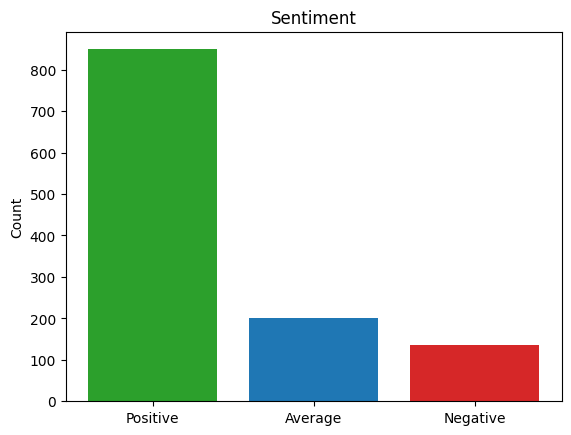

In [49]:
import matplotlib.pyplot as plt
# Membuat diagram review
fig, ax = plt.subplots()
count = [df[df['Reviews'] == 'Positive'].shape[0], df[df['Reviews'] == 'Average'].shape[0], df[df['Reviews'] == 'Negative'].shape[0]]
bar_colors = ['tab:green', 'tab:blue', 'tab:red']

ax.bar(df['Reviews'].unique(), count, label=['Positive', 'Neutral', 'Negative'], color=bar_colors)
ax.set_ylabel('Count')
ax.set_title('Sentiment')

In [50]:
# Membuat sebuah vocab melalui Count Vectorizer dimana CV melihat seberapa sering sebuah kata muncul dalam sebuah dataset
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

cv = CountVectorizer()
words=cv.fit_transform(df['Review_body'])
cv.vocabulary_

{'finished': 2761,
 'squid': 6330,
 'game': 2958,
 'korean': 3913,
 'tv': 7005,
 'show': 6053,
 'become': 719,
 'global': 3039,
 'smash': 6174,
 'hit': 3346,
 'netflix': 4557,
 'truly': 6984,
 'brilliant': 945,
 'even': 2439,
 'better': 772,
 'similar': 6088,
 'japanese': 3789,
 'alice': 366,
 'borderland': 885,
 'centred': 1130,
 'around': 532,
 'contestants': 1505,
 'competing': 1395,
 'children': 1213,
 'games': 2961,
 'cash': 1092,
 'prize': 5221,
 'twist': 7012,
 'get': 3007,
 'killed': 3877,
 'lose': 4117,
 'shades': 5996,
 'saw': 5824,
 'hunger': 3443,
 'rivalled': 5709,
 'battle': 698,
 'royale': 5751,
 'terms': 6736,
 'sheer': 6016,
 'quality': 5351,
 'usual': 7216,
 'korea': 3912,
 'writing': 7566,
 'acting': 258,
 'direction': 1991,
 'superb': 6559,
 'hugely': 3427,
 'suspenseful': 6608,
 'unlike': 7142,
 'anything': 476,
 'seen': 5918,
 'definitely': 1815,
 'horrifying': 3401,
 'enough': 2353,
 'premise': 5178,
 'violent': 7294,
 'bloodshed': 838,
 'count': 1579,
 'horror':

In [51]:
X = words
y = df['Reviews'].values

In [52]:
# Oversampling untuk menyeimbangkan model
from imblearn.over_sampling import SMOTE

X, y = SMOTE().fit_resample(X, y)

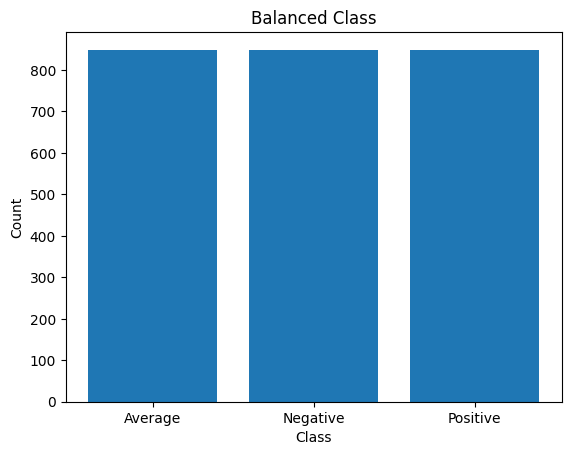

In [53]:
# Plotting Class yang sudah seimbang
import numpy as np

y_un,count = np.unique(y,return_counts=True)
plt.title("Balanced Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.bar([str(i) for i in y_un],count)
plt.show()

# Klasifikasi

Klasifikasi disini menggunakan Logistic Regression, Multinomial Naive Bayes, dan Random Forest Classifier dan direpresentasikan dengan TF-IDF

In [54]:
# Splitting Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [55]:
# Merubah representasi data menjadi TF-IDF
tfidf=TfidfTransformer()
tfidf_X_train=tfidf.fit_transform(X_train)
tfidf_X_test=tfidf.transform(X_test)

In [56]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [57]:
# Model Logistic Regression
lr_model=LogisticRegression()
lr_model.fit(tfidf_X_train,y_train)

LogisticRegression()

In [58]:
# Model MNB
mnb_model=MultinomialNB()
mnb_model.fit(tfidf_X_train,y_train)

MultinomialNB()

In [59]:
# Model RFC
rfc_model=RandomForestClassifier()
rfc_model.fit(tfidf_X_train,y_train)

RandomForestClassifier()

In [67]:
# Classification Report
from sklearn.metrics import plot_confusion_matrix,classification_report
def report(model):
    preds = model.predict(tfidf_X_test)
    print(classification_report(preds,y_test))
    plot_confusion_matrix(model,tfidf_X_test,y_test)

              precision    recall  f1-score   support

     Average       0.58      0.81      0.68       196
    Negative       0.76      0.78      0.77       251
    Positive       0.93      0.68      0.79       318

    accuracy                           0.75       765
   macro avg       0.76      0.76      0.74       765
weighted avg       0.78      0.75      0.75       765



c:\Program Files\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


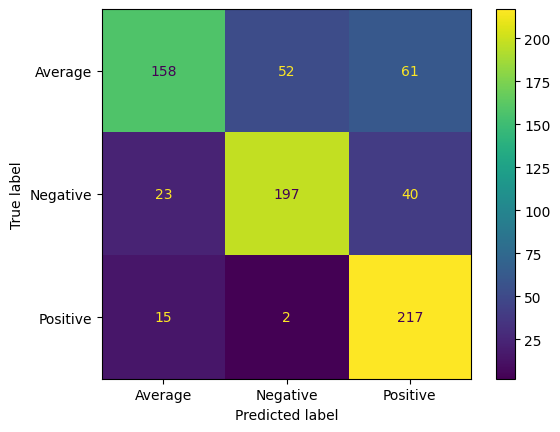

In [68]:
# Report untuk model Logistic Regression
report(lr_model)

              precision    recall  f1-score   support

     Average       0.60      0.75      0.67       216
    Negative       0.79      0.77      0.78       269
    Positive       0.85      0.71      0.77       280

    accuracy                           0.74       765
   macro avg       0.75      0.74      0.74       765
weighted avg       0.76      0.74      0.75       765


c:\Program Files\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


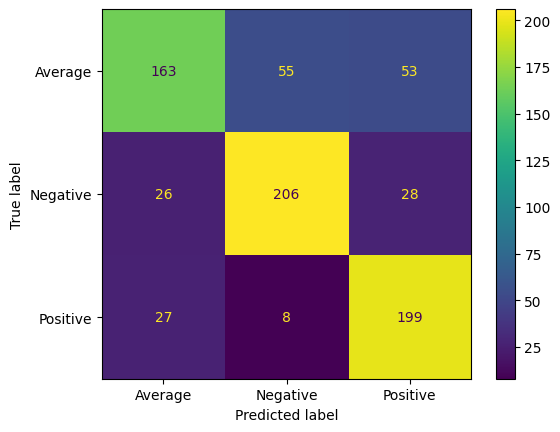

In [62]:
# Report untuk Model MNB
report(mnb_model)

              precision    recall  f1-score   support

     Average       0.65      0.82      0.73       217
    Negative       0.65      0.81      0.72       208
    Positive       0.96      0.66      0.78       340

    accuracy                           0.74       765
   macro avg       0.75      0.76      0.74       765
weighted avg       0.79      0.74      0.75       765



c:\Program Files\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


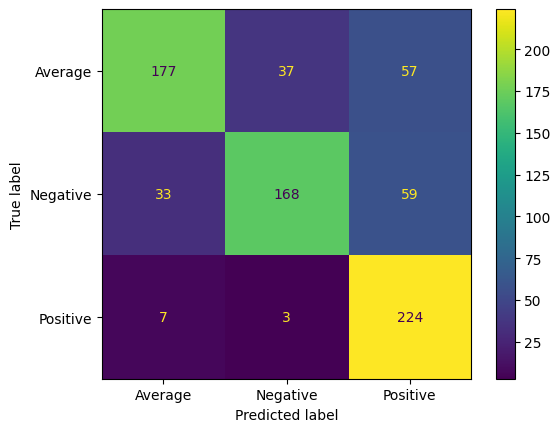

In [63]:
# Report Untuk RFC
report(rfc_model)

In [78]:
from sklearn.metrics import accuracy_score

def accuracy(model):
    preds = model.predict(tfidf_X_test)
    return accuracy_score(preds, y_test)

In [94]:
print(accuracy(mnb_model),
accuracy(rfc_model),
accuracy(lr_model))

0.742483660130719 0.7437908496732026 0.7477124183006536


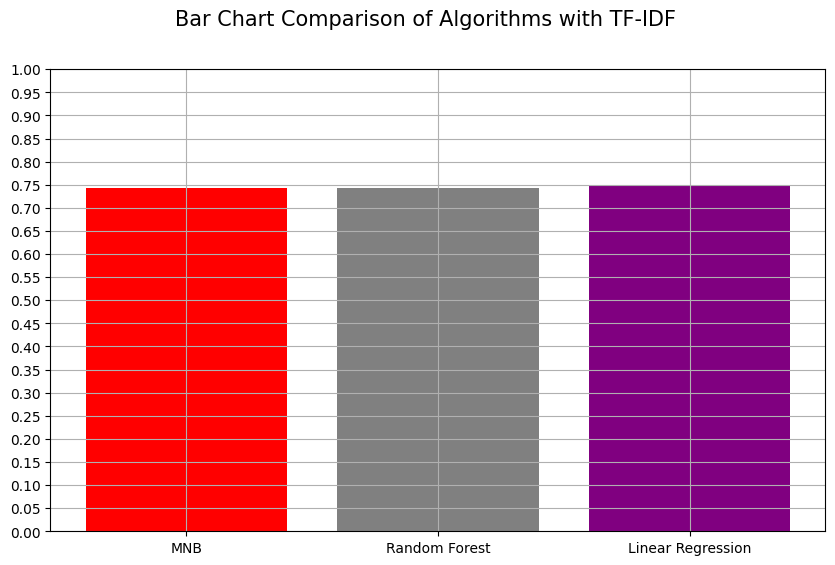

In [93]:
algorithms=("MNB","Random Forest","Linear Regression")
scores = (accuracy(mnb_model), accuracy(rfc_model), accuracy(lr_model))
y_pos = np.arange(0,3)
colors = ("red","gray","purple")
plt.figure(figsize=(10,6))
plt.bar(y_pos,scores,color=colors)
plt.xticks(y_pos,algorithms,fontsize=10)
plt.yticks(np.arange(0.00, 1.01, step=0.05))
plt.grid()
plt.suptitle("Bar Chart Comparison of Algorithms with TF-IDF",fontsize=15)
plt.show()